In [2]:
# POde pular essa etapa se os pacotes já estão instalados
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install librosa
!pip install tqdm
!pip install matplotlib
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 803.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 17.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 886.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 4.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 7.2 MB/s eta 0:00:00
  Using cached pycparser-2.22-py3-none-any.wh

In [53]:
#ref: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential, load_model
from keras.layers import GRU, LSTM, Conv2D, MaxPooling2D, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, TimeDistributed
from PIL import Image
#to play audio
import IPython.display as ipd

In [54]:
# Nesse caso você precisa ter no seu diretório uma pasta com o mesmo nome da variável base_dir
base_dir = "clean_audioset"

tipo_espectrograma = "LM_MFCC"
# E dentro da pasta audioset, você precisa de 3 pastas: carros, motocicletas e motosserras contendo os áudios
audio_carro_path = base_dir + "/carros/"
audio_moto_path = base_dir + "/motocicletas/"  # caminho onde estão os arquivos de audio
audio_serra_path = base_dir + "/motosserras/"

spec_base_path = base_dir + f"/{tipo_espectrograma}"
spec_carro_path = os.path.join(spec_base_path, "carros")
spec_moto_path = os.path.join(spec_base_path, "motocicletas")
spec_serra_path = os.path.join(spec_base_path, "motosserras")
 
os.makedirs(spec_base_path, exist_ok=True)
os.makedirs(spec_carro_path, exist_ok=True)
os.makedirs(spec_moto_path, exist_ok=True)
os.makedirs(spec_serra_path, exist_ok=True)

FILE_FORMAT = "png"
ALTURA_IMAGEM = 40
LARGURA_IMAGEM = 128

In [55]:
audio_carro_clips = sorted(os.listdir(audio_carro_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_carro_path}= ",len(audio_carro_clips))

audio_moto_clips = sorted(os.listdir(audio_moto_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_moto_path}= ",len(audio_moto_clips))

audio_serra_clips = sorted(os.listdir(audio_serra_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_serra_path}= ",len(audio_serra_clips))

Número de arquivos .wav na pasta clean_audioset/carros/=  50
Número de arquivos .wav na pasta clean_audioset/motocicletas/=  50
Número de arquivos .wav na pasta clean_audioset/motosserras/=  50


In [56]:
#aqui está selecionando o primeiro arquivo da lista, pode ser feito um for para pegar todos de uma vez
#verificar esse sample rate
x_carro, sr_carro = librosa.load(audio_carro_path+audio_carro_clips[0]) 
x_moto, sr_moto = librosa.load(audio_moto_path+audio_moto_clips[4]) 
x_serra, sr_serra = librosa.load(audio_serra_path+audio_serra_clips[6]) 

print(type(x_carro), type(sr_carro))
print(x_carro.shape, sr_carro)

print(type(x_moto), type(sr_moto))
print(x_moto.shape, sr_moto)

print(type(x_serra), type(sr_serra))
print(x_serra.shape, sr_serra)

<class 'numpy.ndarray'> <class 'int'>
(220676,) 22050
<class 'numpy.ndarray'> <class 'int'>
(114308,) 22050
<class 'numpy.ndarray'> <class 'int'>
(1323000,) 22050


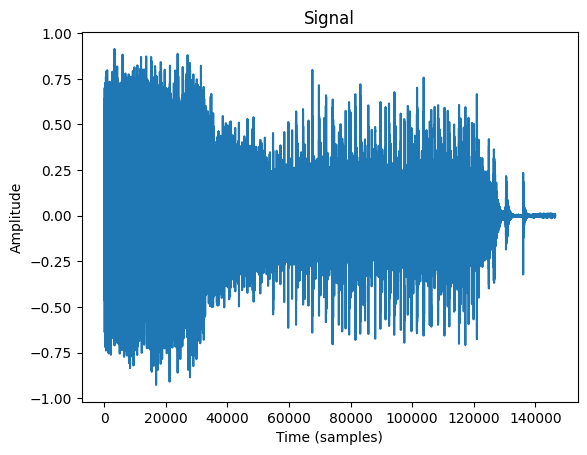

In [38]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(os.path.join(audio_serra_path, audio_serra_clips[20]))
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');


(40, 287)


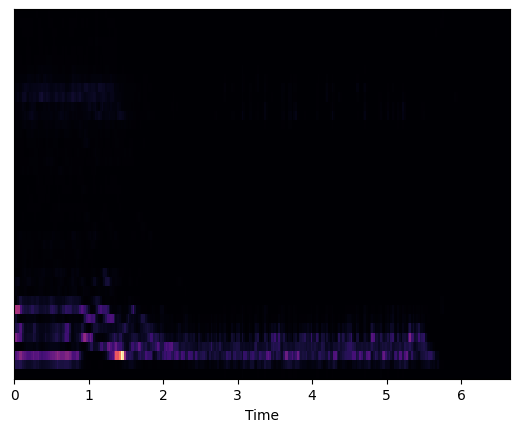

In [39]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

mel_spectrum = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40, n_fft=2048)

print(mel_spectrum.shape)
librosa.display.specshow(mel_spectrum, sr=sr, x_axis="time")

(40, 287)


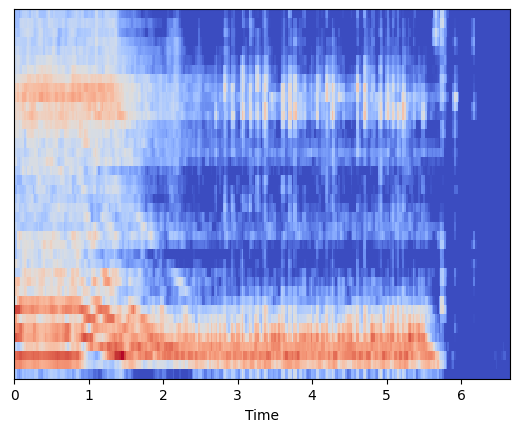

In [40]:
log_mel_spectrum = librosa.amplitude_to_db(mel_spectrum)

print(log_mel_spectrum.shape)
librosa.display.specshow(log_mel_spectrum, sr=sr, x_axis="time")

(40, 287)


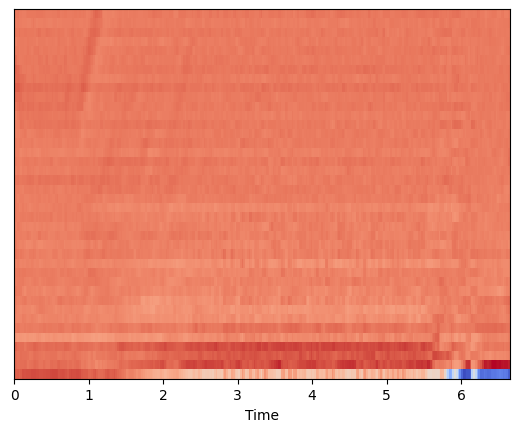

In [41]:
mfcc_spectrum = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
librosa.display.specshow(mfcc_spectrum, sr=sr, x_axis="time")

print(mfcc_spectrum.shape)

# Salvar valores de espectrograma
 - Pule esse passo se os arquivos já estiverem na pasta

In [57]:
##converter o audio para espectrograma:255
## é nesse amplitude_to_dB que ele está convertendo para pressão sonora. Podemos explorar outras ponderações aqui. Se não tiver implementado, podemos implementar.
def gerar_espectrograma(y, sr, tipo):

    if tipo == "log_mel":
        mel_spectrum = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=ALTURA_IMAGEM, n_fft=2048)
        log_mel_spectrum = librosa.amplitude_to_db(mel_spectrum)
        return log_mel_spectrum
    else:
        mfcc_spectrum = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=ALTURA_IMAGEM)
        return mfcc_spectrum
    

def cortar_espectrograma(spectrogram, largura_janela=LARGURA_IMAGEM, altura_janela=ALTURA_IMAGEM):
    altura_spec = spectrogram.shape[0]+1
    largura_spec = spectrogram.shape[1]
    spectrogram_slices = []

    print("Tamanho espectrograma:",spectrogram.shape )

    for h in range(altura_janela, altura_spec, altura_janela):
        for w in range(largura_janela, largura_spec, largura_janela):
            slice = spectrogram[h-altura_janela : h,   # largura
                                w-largura_janela : w,  # altura
                                np.newaxis]
            spectrogram_slices.append(slice)
            
    return spectrogram_slices    
    

In [58]:

# Salvar espectrogramas na pasta específica (carros, serras etc)
def salvar_espectrogtramas (audio_clips, audio_path, spectrogram_path, audios_por_arquivo=50):
    numero_audios = len(audio_clips)
    num_arquivo = 1

    spectrogram_values = []
    
    for i, audio_name in enumerate(audio_clips):
        y, sr = librosa.load( os.path.join(audio_path, audio_name) )
        audio_name = audio_name.replace(".mp3", "")

        fullpath = os.path.join(spectrogram_path, audio_name)
        try:
            mel_spec = gerar_espectrograma(y, sr, tipo="log_mel")
            mel_spec = 255 * (mel_spec - mel_spec.min()) / (mel_spec.max() - mel_spec.min())
            mel_spec = np.flip(mel_spec, axis=0) # put low frequencies at the bottom in image
            #fft_spec = 255 - fft_spec
            mel_spec_slices = cortar_espectrograma(mel_spec)

            mfcc_spec = gerar_espectrograma(y, sr, tipo="mfcc")
            mfcc_spec = 255 * (mfcc_spec - mfcc_spec.min()) / (mfcc_spec.max() - mfcc_spec.min())
            mfcc_spec = np.flip(mfcc_spec, axis=0) # put low frequencies at the bottom in image
            #fft_spec = 255 - fft_spec
            mfcc_spec_slices = cortar_espectrograma(mfcc_spec)
            
            # Salva o arquivo e começa o próximo
            for j in range(len(mel_spec_slices)):
                full_filename = fullpath + f"_{j+1}.{FILE_FORMAT}"
                spec_save = np.hstack(
                    (mel_spec_slices[j][:, :, 0], mfcc_spec_slices[j][:, :, 0])
                )

                if FILE_FORMAT == "csv":
                    np.savetxt(full_filename, spec_save, delimiter=",")
                else:
                    im = Image.fromarray(spec_save).convert("L")
                    im.save(full_filename)
            print("Arquivo %s salvo com sucesso." % full_filename)
            
        except Exception as e:
            print( "Erro ao salvar %s: %s." % (fullpath, e) )


salvar_espectrogtramas(audio_carro_clips, audio_carro_path, spec_carro_path)

salvar_espectrogtramas(audio_moto_clips, audio_moto_path, spec_moto_path)

salvar_espectrogtramas(audio_serra_clips, audio_serra_path, spec_serra_path)


Tamanho espectrograma: (40, 432)
Tamanho espectrograma: (40, 432)
Arquivo clean_audioset/LM_MFCC/carros/(HD) - Forza 4 - Top Gear - Car Test - 1990 Lotus Carlton-0GZbu00-aMY_3.png salvo com sucesso.
Tamanho espectrograma: (40, 431)
Tamanho espectrograma: (40, 431)
Arquivo clean_audioset/LM_MFCC/carros/1968 Chevy Camaro - V8 327 - MUSCLECAR SOUND - restauriert-1ddvRm8MURI_3.png salvo com sucesso.
Tamanho espectrograma: (40, 431)
Tamanho espectrograma: (40, 431)
Arquivo clean_audioset/LM_MFCC/carros/1995 Toyota Supra FOR SALE-2-1wY_Ndtgw_3.png salvo com sucesso.
Tamanho espectrograma: (40, 431)
Tamanho espectrograma: (40, 431)
Arquivo clean_audioset/LM_MFCC/carros/2013 Porsche 911 Carrera Start Up and Review 3.4 L Horizontally Opposed⧸6 Cylinder-9BzZvj5W09s_3.png salvo com sucesso.
Tamanho espectrograma: (40, 388)
Tamanho espectrograma: (40, 388)
Arquivo clean_audioset/LM_MFCC/carros/95 Mustang drag car start up-1sjKon7lrLY_3.png salvo com sucesso.
Tamanho espectrograma: (40, 431)
Tamanh

# Treinamento e teste de rede neural

In [66]:
# Carregar espectrogramas com uma CNN e classificar entre "motosserras e não motosserras"

espectrogramas_carro = sorted(os.listdir(spec_carro_path))
espectrogramas_moto = sorted(os.listdir(spec_moto_path))
espectrogramas_serra = sorted(os.listdir(spec_serra_path))

spectrogram_list = []
labels = []

def carregar_espectrograma(full_filename):
    if FILE_FORMAT == "png":
        return np.asarray(Image.open(full_filename))
    else:
        return np.loadtxt(full_filename, delimiter=",")


def adicionar_rotulos_spec(espectrogramas, spec_path, label):
    for filename in espectrogramas:
        full_filename = os.path.join(spec_path, filename)  

        spectrogram = carregar_espectrograma(full_filename)
        spectrogram_list.append(spectrogram)
        # 0 corresponde aos carros e motos
        labels.append(label)


adicionar_rotulos_spec(espectrogramas_carro, spec_carro_path, 0)
adicionar_rotulos_spec(espectrogramas_moto, spec_moto_path, 0)
adicionar_rotulos_spec(espectrogramas_serra, spec_serra_path, 1)


print("Número de espectrogramas carros: ", len(espectrogramas_carro))
print("Número de espectrogramas motos: ", len(espectrogramas_moto))
print("Número de espectrogramas motosserras: ", len(espectrogramas_serra))

for i in range(len(spectrogram_list)):
    print(spectrogram_list[i].shape)
spectrogram_np = np.array(spectrogram_list) / 255

spectrogram_np = spectrogram_np.reshape(
    (spectrogram_np.shape[0], spectrogram_np.shape[1], spectrogram_np.shape[2], 1)
)
labels_np = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    spectrogram_np, labels_np, test_size=0.05  # , random_state=42
)

print("Amostras treinamento:", len(X_train))
print("Amostras teste:", len(X_test))

Número de espectrogramas carros:  143
Número de espectrogramas motos:  146
Número de espectrogramas motosserras:  275
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(40, 256)
(4

In [67]:
## Initialize the model
#model = Sequential()
#
## Add convolutional layers
#model.add(Conv2D(32, (3, 3), input_shape=X_train[0].shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
## Flatten the output before fully connected layers
#model.add(Flatten())
#
## Fully connected layer with dropout
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#
## Output layer with softmax activation
#model.add(Dense(1, activation='sigmoid')) # Binary classification
#
## Compile the model
#model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
## Print model summaryImage.open
#model.summary()
#model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
#
#model.save(f"checkpoints/{tipo_espectrograma}.keras")
#
model = Sequential()

model.add(Conv2D(16, 3, activation='relu', use_bias=True, bias_initializer='zeros', input_shape=X_train[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Binary classification
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Print model summaryImage.open
model.summary()
model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=16)

model.save(f"checkpoints/{tipo_espectrograma}.keras")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 38, 254, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 19, 127, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 17, 125, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 62, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 60, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 30, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793,985 (3.03 MB)

 Trainable params: 793,985 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.5283 - loss: 0.7010 - val_accuracy: 0.7757 - val_loss: 0.6485
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.6676 - loss: 0.6332 - val_accuracy: 0.6449 - val_loss: 0.5654
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.6990 - loss: 0.5836 - val_accuracy: 0.8411 - val_loss: 0.3939
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.7784 - loss: 0.4500 - val_accuracy: 0.8224 - val_loss: 0.4088
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.8321 - loss: 0.3752 - val_accuracy: 0.8318 - val_loss: 0.4138
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.8840 - loss: 0.3376 - val_accuracy: 0.8318 - val_loss: 0.3881
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.8756 - loss: 0.3288 - val_accuracy: 0.8037 - val_loss: 0.4134
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.8656 - loss: 0.3017 - val_accuracy: 0.

In [68]:
model = load_model(f"checkpoints/{tipo_espectrograma}.keras")
y_pred = model.predict(X_test)[:, 0]
y_pred = np.round(y_pred)
acc = len(np.where(y_pred == y_test)[0]) / len(y_test)
print("Acurácia:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Acurácia: 0.8275862068965517
